# Описание датасета

Датасет классифицирует пациетов на здоровых и с заболеваниями сердца. В качестве параметров заданы 13 различных показателей.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import os

## Просмотр данных

In [4]:
PATH = '../data/external/heart.csv'
df = pd.read_csv("PATH")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Поля:

* age - возраст в годах
* sex - (1 = мужской; 0 = женский)
* cp - тип боли в груди <br>
* trestbps - кровенное давление в покое (в мм рт. ст.)
* chol - холестерин в сыворотке крови (в мг/дл)
* fbs - уровень сахара в крови натощак > 120 мг/дл (1 = true; 0 = false)
* restecg - результаты электрокардиографии в покое
* thalach - максимальная частота сердечных сокращений
* exang - стенокардия, вызванная физической нагрузкой (1 = yes; 0 = no)
* oldpeak - Депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом
* slope - наклон сегмента ST при пиковой нагрузке
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal - талассемия 3 = нормально; 6 = исправленный дефект; 7 = обратимый дефект
* target - есть заболевание или нет (1 = да, 0 = нет)

## Анализ данных

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

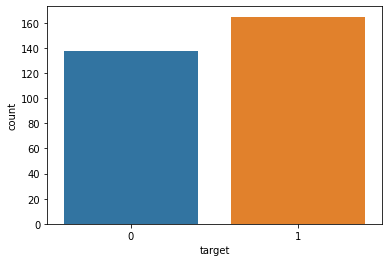

In [9]:
sns.countplot(x="target", data=df)
plt.show()

In [12]:
no_disease = len(df[df.target == 0])
have_disease = len(df[df.target == 1])
print('% без заболеваний:', round(no_disease / (len(df.target)) * 100, 2))
print('% с заболеваниями:', round(have_disease / (len(df.target)) * 100, 2))

% без заболеваний: 45.54
% с заболеваниями: 54.46


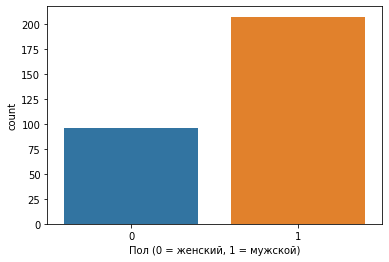

In [15]:
sns.countplot(x='sex', data=df,)
plt.xlabel('Пол (0 = женский, 1 = мужской)')
plt.show()

In [16]:
female = len(df[df.sex == 0])
male = len(df[df.sex == 1])
print('% жен.:', round(female / (len(df.target)) * 100, 2))
print('% муж.:', round(male / (len(df.target)) * 100, 2))

% жен.: 31.68
% муж.: 68.32


In [17]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


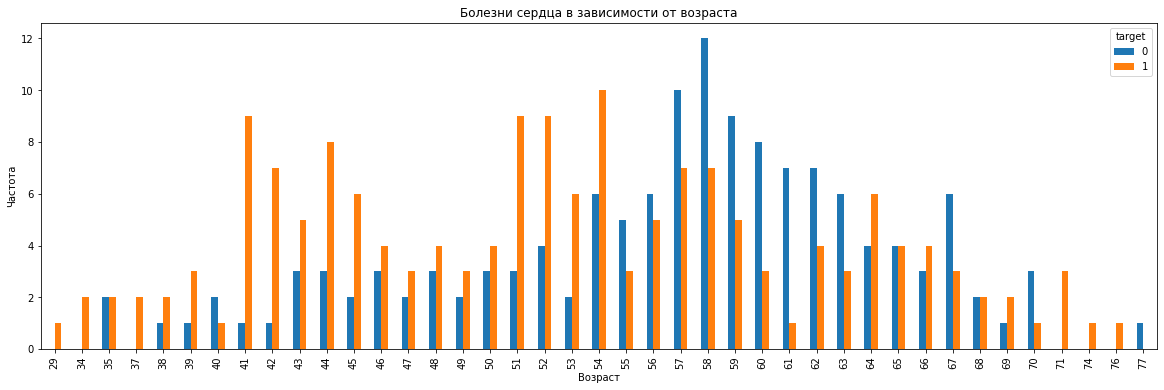

In [18]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20, 6))
plt.title('Болезни сердца в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

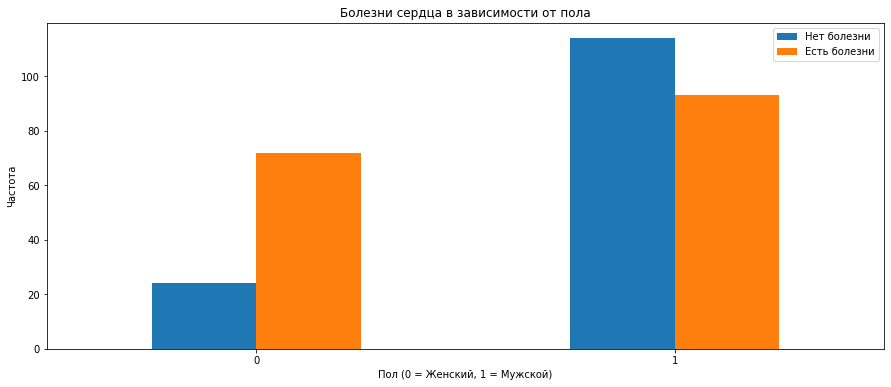

In [25]:
pd.crosstab(df.sex, df.target).plot(kind='bar',figsize=(15, 6))
plt.title('Болезни сердца в зависимости от пола')
plt.xlabel('Пол (0 = Женский, 1 = Мужской)')
plt.xticks(rotation=0)
plt.legend(["Нет болезни", "Есть болезнь"])
plt.ylabel('Частота')
plt.show()

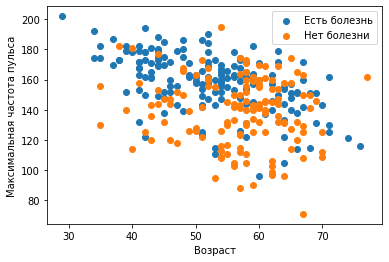

In [21]:
plt.scatter(x=df.age[df.target == 1], y=df.thalach[(df.target == 1)])
plt.scatter(x=df.age[df.target == 0], y=df.thalach[(df.target == 0)])
plt.legend(["Есть болезнь", "Нет болезни"])
plt.xlabel("Возраст")
plt.ylabel("Максимальная частота пульса")
plt.show()

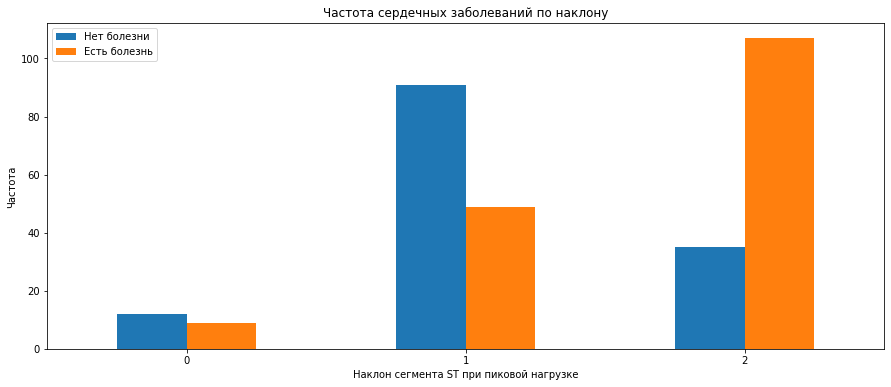

In [28]:
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Частота сердечных заболеваний по наклону')
plt.legend(["Нет болезни", "Есть болезнь"])
plt.xlabel('Наклон сегмента ST при пиковой нагрузке')
plt.xticks(rotation=0)
plt.ylabel('Частота')
plt.show()

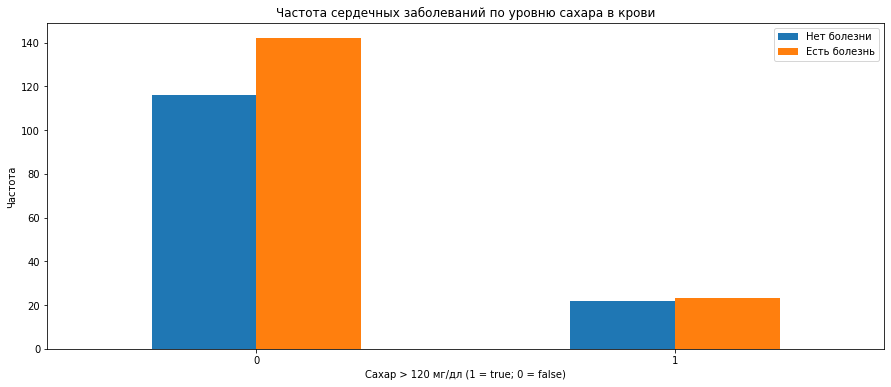

In [29]:
pd.crosstab(df.fbs, df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Частота сердечных заболеваний по уровню сахара в крови')
plt.xlabel('Сахар > 120 мг/дл (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(['Нет болезни', 'Есть болезнь'])
plt.ylabel('Частота')
plt.show()

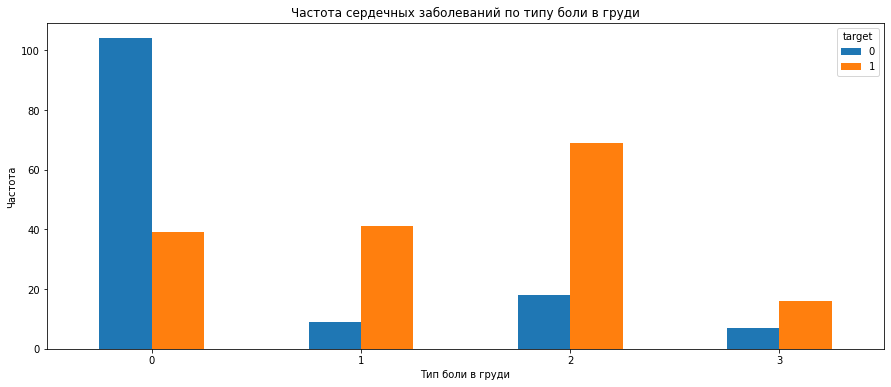

In [30]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(15, 6))
plt.title('Частота сердечных заболеваний по типу боли в груди')
plt.xlabel('Тип боли в груди')
plt.xticks(rotation=0)
plt.ylabel('Частота')
plt.show()